In [372]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')


def formattingStyle():
    # This will change to your computer's default Times New Roman font
    plt.rcParams["font.family"] = "Calibri"
    
    # setting the font size
    SMALL_SIZE = 12
    MEDIUM_SIZE = 12
    BIGGER_SIZE = 12

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    # set the style of the plots
    sns.set_style("white",  {'axes.edgecolor': '0.0', 'axes.linewidth': 0.1, 'grid.color': '.9'}) 

    # set the color palette
    sns.set_palette("RdPu")

    pd.options.display.float_format = '{:,.2f}'.format

formattingStyle()

# Setting

In [373]:
try:
    from google.colab import drive
    colab = True
    drive.mount('/content/drive')
    data_path = '/content/drive/Shared drives/MSD 23 Drive/Datasets'
    output_path = '/content/drive/Shared drives/MSD 23 Drive/Figures'
except:
    colab = False
    data_path = './MSD Datathon Files/Datasets/'
    output_path = './FMSD Datathon Report/figures/'

print('Data path: ', data_path)
print('Output path: ', output_path)

Data path:  ./MSD Datathon Files/Datasets/
Output path:  ./output/


In [374]:
# load data
df_treatments_facilities = pd.read_csv(os.path.join(data_path, 'treatment_facilities_2016_2020.csv'))
df_treatments_facilities.year = df_treatments_facilities.year.astype(int)
print(df_treatments_facilities.shape)
df_treatments_facilities.head(2)

(74820, 97)


,CASEID,STATE,DETOX,TREATMT,OWNERSHP,FEDOWN,HOSPITAL,LOCS,ASSESSMENT,TESTING,...,REVCHK5,REVCHK10,REVCHK15,REVCHK2,REVCHK17,LOC5,LICEN,ACCRED,year,state_fips
0,1,AK,0,1,5,NaN,0,NaN,7.00,1.00,...,1,1,1,1,1,0,1,1,2016,2.00
1,2,AK,0,1,2,NaN,0,NaN,5.00,3.00,...,1,1,1,1,D,0,1,1,2016,2.00


In [375]:
# check number of unique states per year
df_treatments_facilities.groupby('year').STATE.nunique()

year
2016    57
2017    53
2018    53
2019    53
2020    53
Name: STATE, dtype: int64

In [376]:
pop = pd.read_csv(os.path.join(data_path, 'state_county_cbsa_population.csv'), thousands=',')
pop.head(2)

,Geographic Area Name,2010_population,2011_population,2012_population,2013_population,2014_population,2015_population,2016_population,2017_population,2018_population,2019_population
0,Alabama,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185
1,Alaska,713910,722128,730443,737068,736283,737498,741456,739700,735139,731545


In [377]:
us_states_abbrev = {'Alabama': 'AL', 'Alaska': 'AK', 'American Samoa': 'AS', 'Arizona': 'AZ', 'Arkansas': 'AR',
                    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC',
                    'Florida': 'FL', 'Georgia': 'GA', 'Guam': 'GU', 'Hawaii': 'HI', 'Idaho': 'ID',
                    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY',
                    'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI',
                    'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE',
                    'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
                    'North Carolina': 'NC', 'North Dakota': 'ND', 'Northern Mariana Islands':'MP', 'Ohio': 'OH',
                    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Puerto Rico': 'PR', 'Rhode Island': 'RI',
                    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
                    'Vermont': 'VT', 'Virgin Islands': 'VI', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
                    'Wisconsin': 'WI', 'Wyoming': 'WY'}

pop['Geographic Area Name'] = pop['Geographic Area Name'].map(us_states_abbrev)
pop.rename(columns={'Geographic Area Name': 'STATE'}, inplace=True)
# keep only the states 
pop = pop[pop['STATE'].isin(df_treatments_facilities['STATE'].unique())]

In [378]:
# make wide to long with columns _population
cols = [f'{i}_population' for i in range(2010, 2020)]
pop = pop.melt(id_vars=['STATE'], value_vars=cols, var_name='year', value_name='population')
pop.year = pop.year.str.replace('_population', '').astype(int)
# drop if pop.year < min(df_treatments_facilities.year)
pop = pop[pop.year >= min(df_treatments_facilities.year)]
pop.head(2)

,STATE,year,population
312,AL,2016,4863525
313,AK,2016,741456


In [379]:
df_treatments_facilities['STATE'].nunique()    

58

In [380]:
pop['STATE'].nunique()    

52

In [381]:
# drop all columns that start with LANG - info abour laguage is missing in 95% of the data 
df_treatments_facilities = df_treatments_facilities.drop(columns=df_treatments_facilities.columns[df_treatments_facilities.columns.str.startswith('LANG')])

In [382]:
# missing values normalizedand more than zero
missing = df_treatments_facilities.isnull().sum()/df_treatments_facilities.shape[0]*100
display(missing[missing>0].sort_values(ascending=False))
del missing

# CTYPEHI1 - Facility offers hospital inpatient detoxification:
# CTYPEHI2 - Facility offers hospital inpatient treatment
# LOCS     - A categorical variable of the type of hospital if the facility is a hospital:
# CTYPERC4 - Facility offers non-hospital residential long-term treatment:
# CTYPERC1 - Facility offers non-hospital residential detoxification:
# CTYPERC3 - Facility offers non-hospital residential short-term treatment:
# ONLYDUI  - All substance abuse treatment clients identifying as DUI/DWI offender.
# OPIOIDMAINT - Maintenance services with methadone or buprenorphine.
# OPIOIDWDRAW   Maintenance services with medically supervised withdrawal after pre-determined time.
# OPIOIDDETOX  Detoxification services with methadone or burprenorphine.
# OPIOIDNAL  Relapse prevention with naltrexone # COMPSAT Use frequency of computerized substance abuse treatment

FEDOWN        97.86
CTYPEHI2      94.64
CTYPEHI1      94.64
LOCS          90.96
CTYPERC4      76.33
CTYPERC1      76.33
CTYPERC3      76.33
ONLYDUI       74.82
OPIOIDMAINT   59.92
OPIOIDWDRAW   59.92
OPIOIDDETOX   59.92
OPIOIDNAL     59.92
COMPSAT       42.81
CTYPE2        17.85
CTYPEOP       17.85
CTYPEML       17.85
CTYPE6        17.85
CTYPE3        17.85
FEESCALE       0.30
PAYASST        0.30
state_fips     0.05
OTHER_SRVC     0.01
TRANSITION     0.00
ASSESSMENT     0.00
ANCILLARY      0.00
TESTING        0.00
dtype: float64

In [383]:
# drop columns with more that 90% missing values
df_treatments_facilities.dropna(axis=1, thresh=0.1*df_treatments_facilities.shape[0], inplace=True)

<AxesSubplot:>

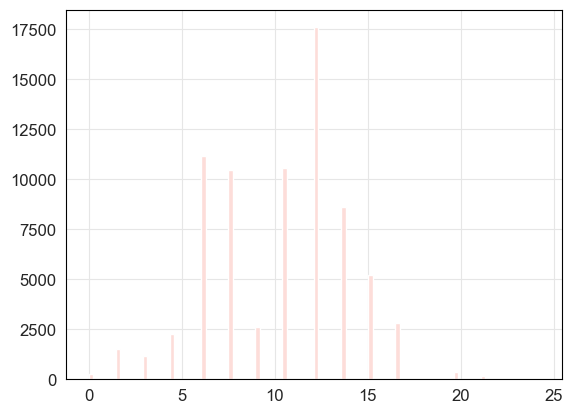

In [384]:
# missing values by row 
missing = df_treatments_facilities.isnull().sum(axis=1)/df_treatments_facilities.shape[1]*100
missing.hist(bins=100)

In [385]:
compsat_dict = {1: 'Never', 2: 'Rarely', 3: 'Sometimes', 4: 'Always/often', 5: 'Approach unfamiliar'}
df_treatments_facilities['COMPSAT'] = df_treatments_facilities['COMPSAT'].map(compsat_dict)

OWNERSHP_dict = {1: 'Private-for-profit organization', 
                 2: 'Private non-profit organization', 
                 3: 'State government', 
                 4: 'Local, county or community government', 
                 5: 'Tribal Government', 
                 6: 'Federal Government'}

df_treatments_facilities['OWNERSHP'] = df_treatments_facilities['OWNERSHP'].map(OWNERSHP_dict)

# make dummies for categorical variables COMPSAT and OWNERSHP
df_treatments_facilities = pd.get_dummies(df_treatments_facilities, columns=['COMPSAT', 'OWNERSHP'])


In [386]:
# convert all columns that is either 0 or 1 to boolean

for col in df_treatments_facilities.columns:
    if df_treatments_facilities[col].nunique() == 2:
        df_treatments_facilities[col] = df_treatments_facilities[col].astype(bool)

In [387]:
df_treatments_facilities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74820 entries, 0 to 74819
Data columns (total 70 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   CASEID                                          74820 non-null  int64  
 1   STATE                                           74820 non-null  object 
 2   DETOX                                           74820 non-null  bool   
 3   TREATMT                                         74820 non-null  bool   
 4   HOSPITAL                                        74820 non-null  object 
 5   ASSESSMENT                                      74818 non-null  float64
 6   TESTING                                         74819 non-null  float64
 7   TRANSITION                                      74817 non-null  float64
 8   ANCILLARY                                       74818 non-null  float64
 9   OTHER_SRVC                             

In [388]:
# create a list of all object columns
object_cols = list(df_treatments_facilities.select_dtypes(include=['object']).columns)
# remove 'STATE'
object_cols.remove('STATE')

# replace all letters to nan in object columns
for col in object_cols:
    df_treatments_facilities[col] = df_treatments_facilities[col].replace(1.0, "1")
    df_treatments_facilities[col] = df_treatments_facilities[col].replace(0.0, "0")
    df_treatments_facilities[col] = df_treatments_facilities[col].replace(1, "1")
    df_treatments_facilities[col] = df_treatments_facilities[col].replace(0, "0")
    df_treatments_facilities[col] = df_treatments_facilities[col].str.replace('M', '')
    df_treatments_facilities[col] = df_treatments_facilities[col].str.replace('R', '')
    df_treatments_facilities[col] = df_treatments_facilities[col].str.replace('D', '')
    df_treatments_facilities[col] = df_treatments_facilities[col].str.replace('V', '')
    df_treatments_facilities[col] = df_treatments_facilities[col].replace('', np.nan)
    df_treatments_facilities[col] = df_treatments_facilities[col].astype(float)

In [389]:
# drop if 'PR', 'VI', 'FM', 'PW', 'MP', 'ZZ', 'GU'
df_treatments_facilities = df_treatments_facilities[~df_treatments_facilities['STATE'].isin(['PR', 'VI', 'FM', 'PW', 'MP', 'ZZ', 'GU'])]

In [390]:
# group by state and year and calculate the mean for each column
cont_cols = ['ASSESSMENT', 'TESTING', 'TRANSITION', 'ANCILLARY', 'OTHER_SRVC']
binar_cols = ['DETOX',  'TREATMT',  'HOSPITAL',  'SRVC75',  'SRVC71',  'SRVC108',  'SRVC85',  'SRVC87',  'SRVC86',  'OTP',  'OPIOIDMAINT',
    'OPIOIDWDRAW',  'OPIOIDDETOX',  'OPIOIDNAL',  'DUI_DWI',  'ONLYDUI',  'SIGNLANG',  'SRVC30',  'SRVC34',  'SRVC33',  'SRVC64',  'SRVC63',
    'SRVC62',  'SRVC113',  'SRVC114',  'SRVC115',  'SRVC61',  'SRVC31',  'SRVC32',  'SRVC116',  'CTYPE4',  'CTYPE7',  'CTYPERC1',  'CTYPERC3',
    'CTYPERC4',  'CTYPE1',  'CTYPE6',  'CTYPEML',  'CTYPEOP',  'CTYPE2',  'CTYPE3', 'FEESCALE',  'PAYASST',  'EARMARK',
    'REVCHK3',  'REVCHK1',  'REVCHK8',  'REVCHK5',  'REVCHK10',  'REVCHK15',  'REVCHK2',  'REVCHK17',
    'LOC5',  'LICEN',  'ACCRED',  'OWNERSHP_Federal Government',  'OWNERSHP_Local, county or community government', 
    'OWNERSHP_Private non-profit organization',     'OWNERSHP_Private-for-profit organization',  'OWNERSHP_State government',  'OWNERSHP_Tribal Government']

# fo binary columns calculate the mean
df_treatments_facilities_grouped_mean = df_treatments_facilities.groupby(['STATE', 'year'])[binar_cols].mean().reset_index()
# for continuous columns calculate the sum
df_treatments_facilities_grouped_sum = df_treatments_facilities.groupby(['STATE', 'year'])[cont_cols].sum().reset_index()
# for CASEID count the number of rows
df_treatments_facilities_grouped_sum['CASEID'] = df_treatments_facilities.groupby(['STATE', 'year'])['CASEID'].count().reset_index()['CASEID']

# merge the two dataframes
df_treatments_facilities_grouped = pd.merge(df_treatments_facilities_grouped_mean, df_treatments_facilities_grouped_sum, on=['STATE', 'year'])
df_treatments_facilities_grouped.rename(columns={'CASEID': 'facility_counts'}, inplace=True)


In [391]:
pop.year = pop.year.astype(int)
# merge with pop
df_treatments_facilities_grouped = pd.merge(df_treatments_facilities_grouped, pop, on=['STATE', 'year'])
df_treatments_facilities_grouped['facility_density'] = df_treatments_facilities_grouped['facility_counts'] / df_treatments_facilities_grouped['population'] * 100000

Text(0.5, 1.0, 'Facility offers substance abuse treatment services (share)')

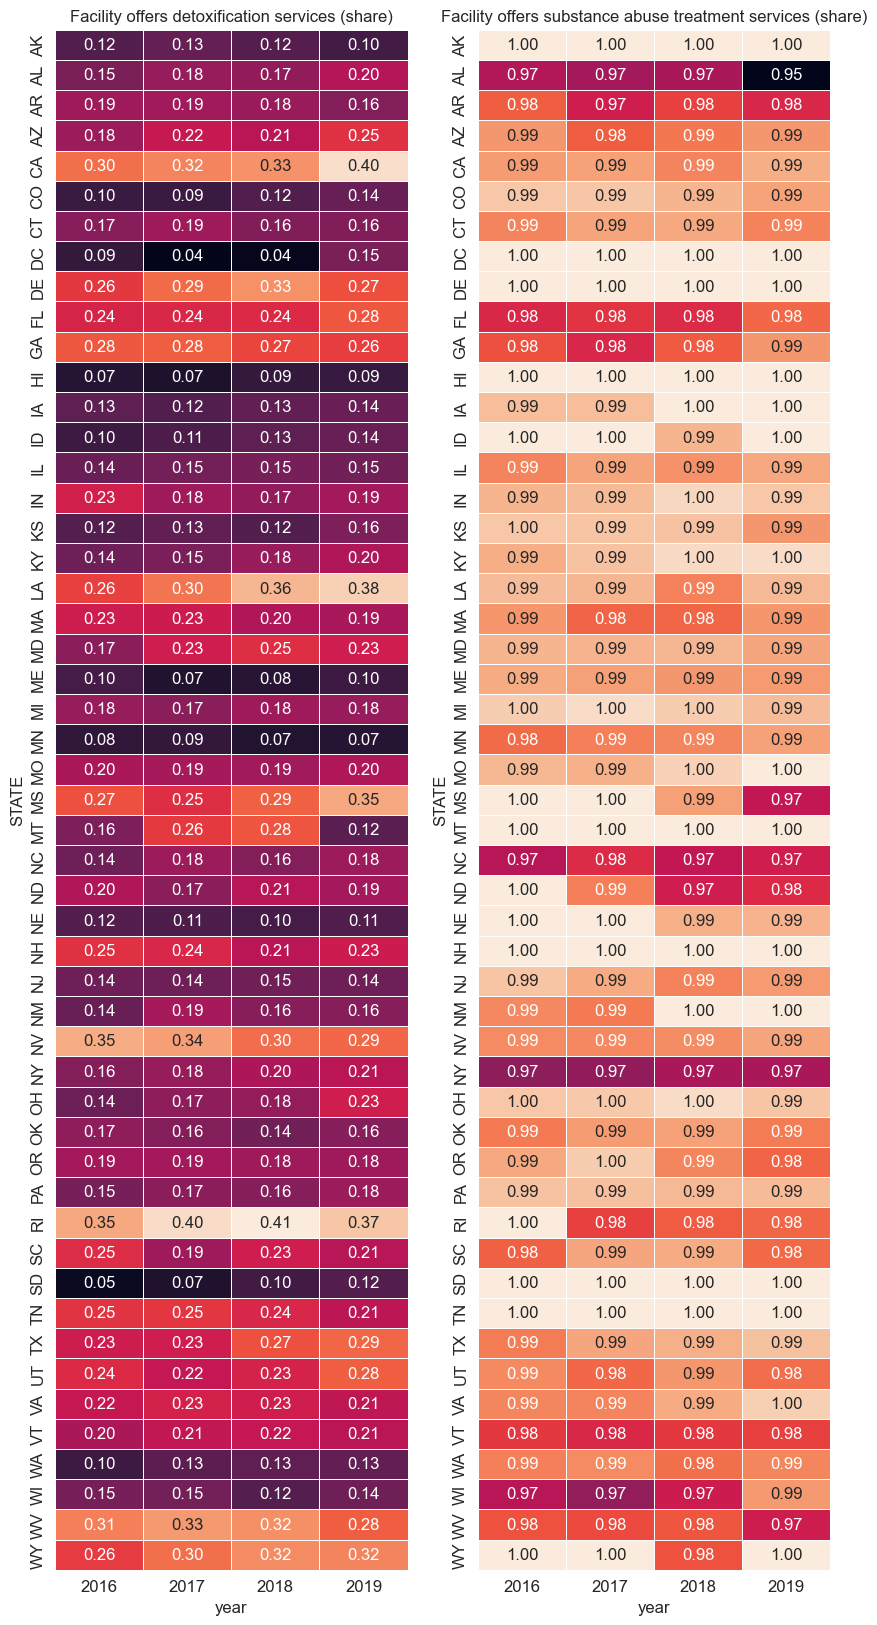

In [392]:
# vizulize DETOX and TREATMN by state and year in a heatmap

df_treatments_facilities_temp= df_treatments_facilities_grouped[['STATE', 'year', 'DETOX', 'TREATMT']]
df_treatments_facilities_temp = df_treatments_facilities_temp.pivot(index='STATE', columns='year', values=['DETOX', 'TREATMT'])

fig, ax = plt.subplots(1, 2, figsize=(10, 20))
sns.heatmap(df_treatments_facilities_temp['DETOX'], annot=True, fmt=".2f", linewidths=.5,  cbar=False, ax = ax[0])
sns.heatmap(df_treatments_facilities_temp['TREATMT'], annot=True, fmt=".2f", linewidths=.5,  cbar=False, ax = ax[1])

ax[0].set_title('Facility offers detoxification services (share)')
ax[1].set_title('Facility offers substance abuse treatment services (share)')

Text(0.5, 1.0, 'Maintenance services  \n with methadone or buprenorphine (share)')

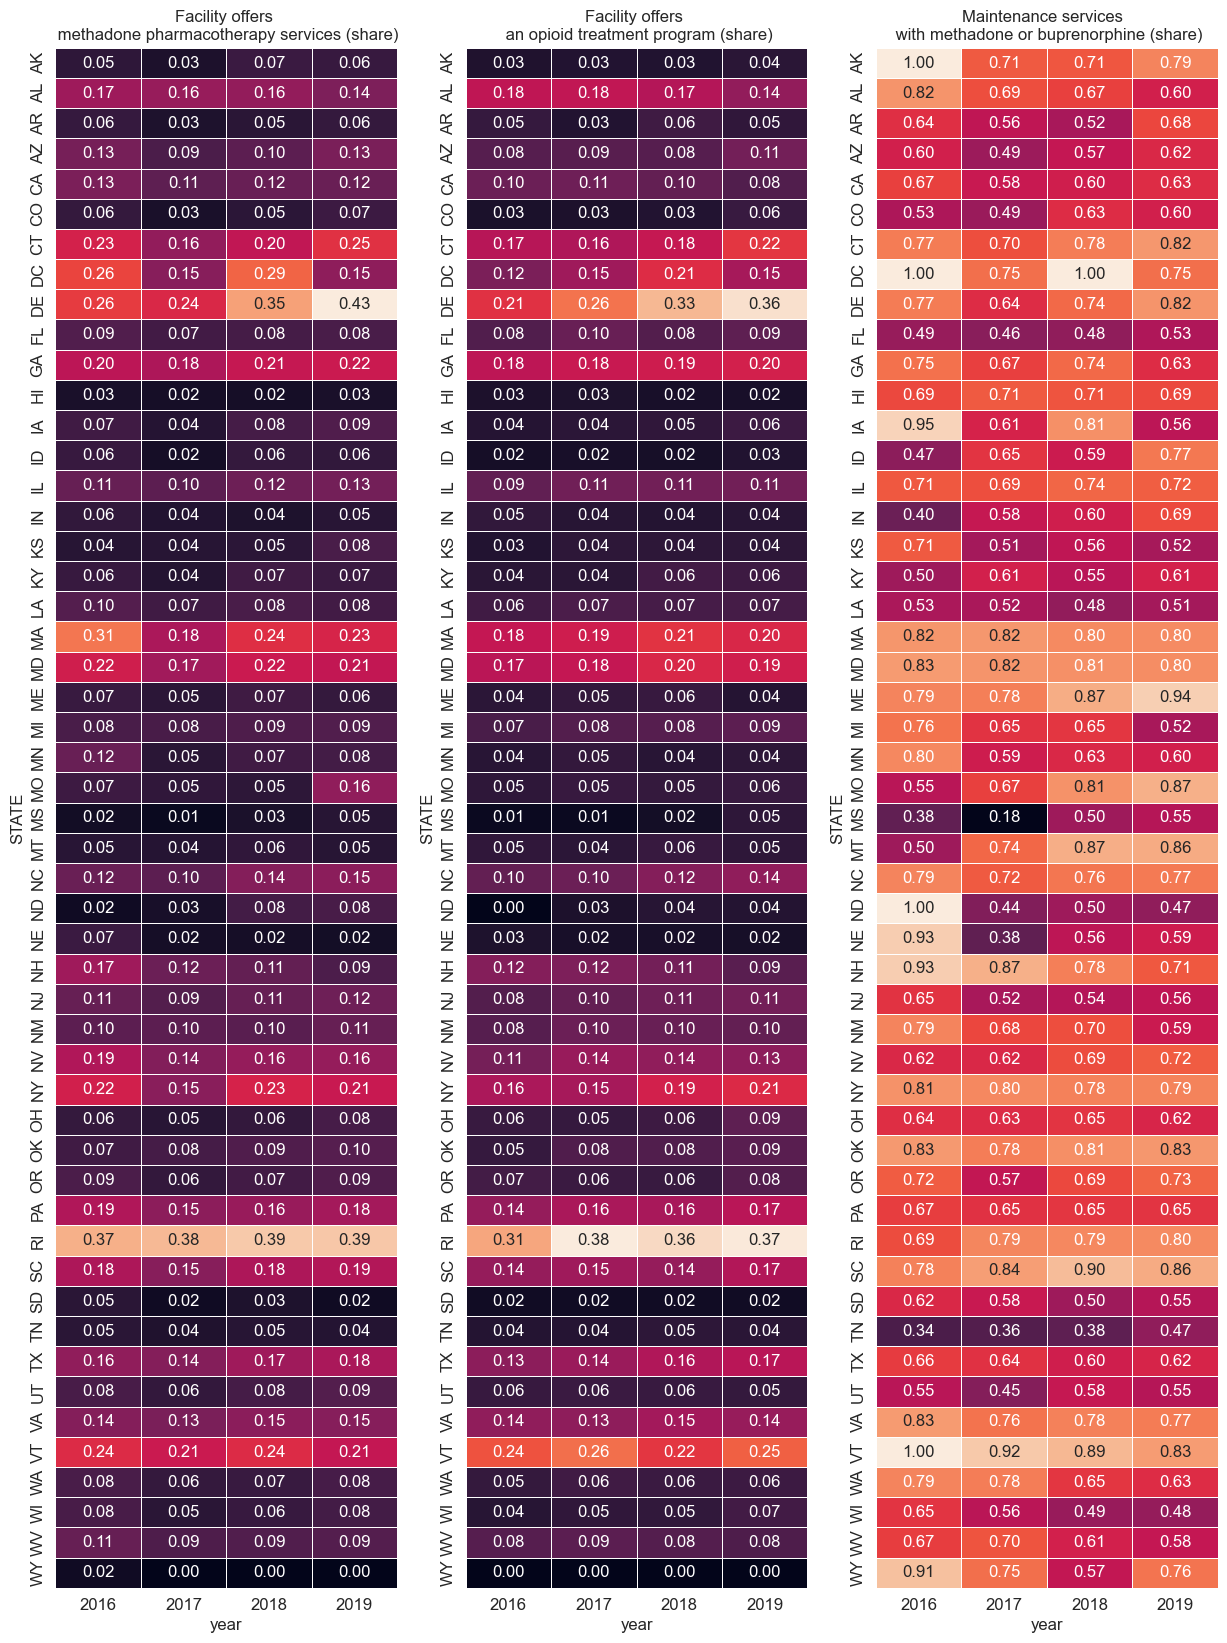

In [393]:
# vizulize DETOX and TREATMN by state and year in a heatmap

df_treatments_facilities_temp= df_treatments_facilities_grouped[['STATE', 'year', 'SRVC85', 'OTP','OPIOIDMAINT' ]]
df_treatments_facilities_temp = df_treatments_facilities_temp.pivot(index='STATE', columns='year', values=['SRVC85', 'OTP','OPIOIDMAINT'])

fig, ax = plt.subplots(1, 3, figsize=(15, 20))
sns.heatmap(df_treatments_facilities_temp['SRVC85'], annot=True, fmt=".2f", linewidths=.5,  cbar=False, ax = ax[0])
sns.heatmap(df_treatments_facilities_temp['OTP'], annot=True, fmt=".2f", linewidths=.5,  cbar=False, ax = ax[1])
sns.heatmap(df_treatments_facilities_temp['OPIOIDMAINT'], annot=True, fmt=".2f", linewidths=.5,  cbar=False, ax = ax[2])

ax[0].set_title('Facility offers \n methadone pharmacotherapy services (share)')
ax[1].set_title('Facility offers \n an opioid treatment program (share)')
ax[2].set_title('Maintenance services  \n with methadone or buprenorphine (share)')

In [394]:

name = 'facility_state_year.csv'
file = os.path.join(data_path, name)
df_treatments_facilities_grouped.to_csv(file, index=False)

# **MAP**

----

In [395]:
%%capture
if colab:
    !pip install cartopy
    !pip install geopandas
    import cartopy
    import geopandas as gpd
else:
    import geopandas as gpd

In [396]:
# geometry data for US from API as geopandas
url = 'https://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_500k.json'
us_states = gpd.read_file(url)
us_states.head()
us_states['STATE'] = us_states['NAME'].map(us_states_abbrev)
us_states = us_states[['STATE', 'geometry']]


In [397]:
# merge df_us_geo with facility_density
temp = df_treatments_facilities_grouped[['STATE', 'year', 'facility_density']]
facility_density_geo = us_states.merge(temp , on='STATE')

<AxesSubplot:>

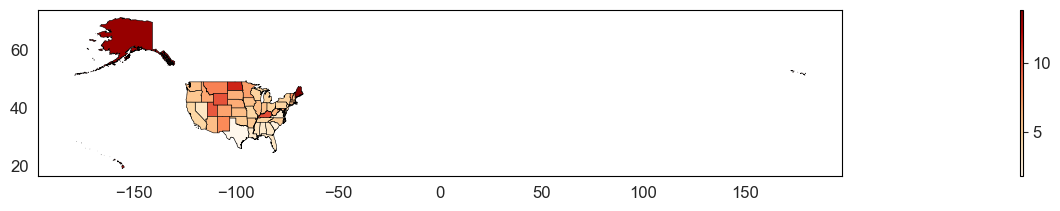

In [398]:
# plot map of facility density for the year 2019
fig, ax = plt.subplots(figsize=(15, 10))
facility_density_geo_2019 = facility_density_geo[facility_density_geo.year == 2019]

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0, aspect=6)
facility_density_geo_2019.plot(column='facility_density', ax=ax, legend=True, cax=cax, cmap='OrRd', edgecolor='black', linewidth=0.4)

